In [19]:
import os
import glob
import os
import pandas as pd
from PIL import Image
import shutil
import csv
import pyarrow.parquet as pq
from datasets import load_dataset


/Users/tnguyen/anaconda3/envs/lolify/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:

# Define the directory path
directory_path = '/Users/tnguyen/Documents/DiffusionExp/OnePieceKaggle/data'

# Search for all files ending with 'inverted.png' in the directory and its subdirectories
for filename in glob.glob(os.path.join(directory_path, '**', '*Rotated*'), recursive=True):
    os.remove(filename)
    print(f"Deleted: {filename}")

In [17]:
# Directories
outer_directory = '/Users/tnguyen/Documents/DiffusionExp/data/OnePieceKaggle_Small'
output_directory = '/Users/tnguyen/Documents/DiffusionExp/data/OnePieceKaggle_Small_hf'
os.makedirs(output_directory, exist_ok=True)


csv_file = '/Users/tnguyen/Documents/DiffusionExp/data/OnePieceKaggle_Small_hf/metadata.csv'

with open(csv_file, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['image', 'text'])
    image_counter = 0

    for class_name in os.listdir(outer_directory):
        class_path = os.path.join(outer_directory, class_name)
        if os.path.isdir(class_path):
            for i, image_file in enumerate(os.listdir(class_path)):
                if(i < 5):
                    image_path = os.path.join(class_path, image_file)
                    if os.path.isfile(image_path):
                        # Process the image
                        try:
                            image = Image.open(image_path)
                            image_name = f'image_{image_counter}.png'
                            output_image_path = os.path.join(output_directory, image_name)
                            image.save(output_image_path)
                            writer.writerow([image_name,class_name])
                            # Increment image counter
                            image_counter += 1
                        except:
                            continue


In [ ]:
# Load your dataset from Hugging Face
dataset = load_dataset("lambdalabs/pokemon-blip-captions", split="train")
# Create a directory for images if it doesn't exist
image_dir = '/Users/tnguyen/Documents/DiffusionExp/pokemon'
os.makedirs(image_dir, exist_ok=True)

csv_file = 'metadata.csv'

with open(csv_file, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)

    # Write the header row
    writer.writerow(['image', 'text'])  # Modify as per your dataset fields
    # Iterate over the dataset and write rows to the CSV file
    for i, item in enumerate(dataset):  # Replace 'train' with the appropriate split if necessary
        image = item['image']
        image_name = f'image_{i}.png'
        image_path = os.path.join(image_dir, image_name)
        image.save(image_path)
        writer.writerow([image_name, item['text']])


Resolving data files: 100%|██████████| 31/31 [00:00<00:00, 337723.18it/s]


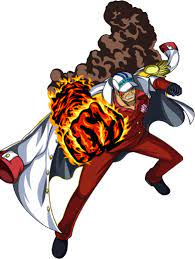

In [23]:
d = load_dataset("/Users/tnguyen/Documents/DiffusionExp/data/OnePieceKaggle_Small_hf")
d['train'][0]['image']